# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [11]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

## Part1: Linear Regression

E_train is 0.04, E_test is 0.10526315789473684


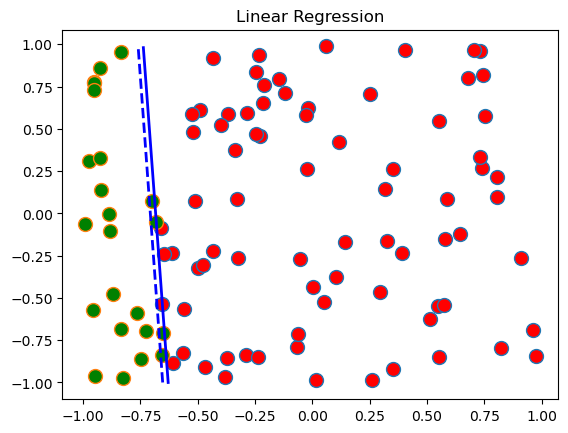

In [12]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)

    X_test = X[:, nTrain-19:]
    y_test = y[:, nTrain-19:]
    w_g = linear_regression(X, y)
    y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T
   
    #TODO
    # Compute training, testing error
    E_train = np.mean(y.T != y_train_pred)
    E_test = np.mean(y_test.T != y_test_pred)

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression');


## Part2: Linear Regression: noisy

E_train is 0.14, E_test is 0.15789473684210525


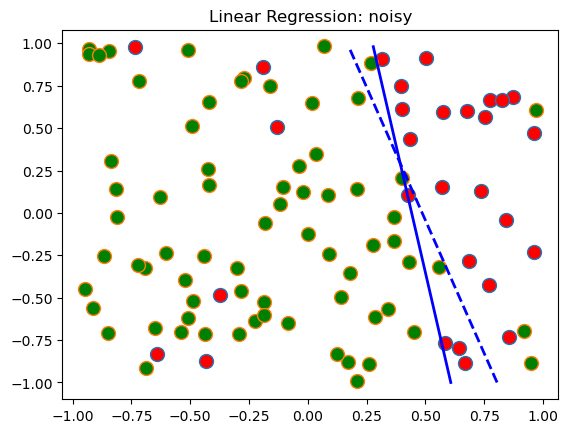

In [17]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    X_test = X[:, nTrain-19:]
    y_test = y[:, nTrain-19:]
    w_g = linear_regression(X, y)
    y_train_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T
    #TODO
    # Compute training, testing error
    E_train = np.mean(y.T != y_train_pred)
    E_test = np.mean(y_test.T != y_test_pred)

print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Linear Regression: noisy');

## Part3: Linear Regression: poly_fit

In [18]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
#TODO
# Compute training, testing error
y_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
E_train = np.mean(y.T != y_pred)
y_test_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T
E_test =np.mean(y_test.T != y_test_pred)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = np.vstack([
    X[0, :],
    X[1, :],
    X[0, :]**2,
    X[1, :]**2,
    X[0, :] * X[1, :]
])  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack([
    X_test[0, :],
    X_test[1, :],
    X_test[0, :]**2,
    X_test[1, :]**2,
    X_test[0, :] * X_test[1, :]
])# CHANGE THIS LINE TO DO TRANSFORMATION
w = linear_regression(X_t, y)
#TODO
# Compute training, testing error
y_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_t.shape[1])), X_t)))).T
E_train = np.mean(y.T != y_pred)
y_test_pred = np.sign(np.matmul(w.T, np.vstack((np.ones((1, X_test_t.shape[1])), X_test_t)))).T
E_test =np.mean(y_test.T != y_test_pred)
print('E_train is {}, E_test is {}'.format(E_train, E_test))


E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part4: Logistic Regression

E_train is 0.01, E_test is 0.0


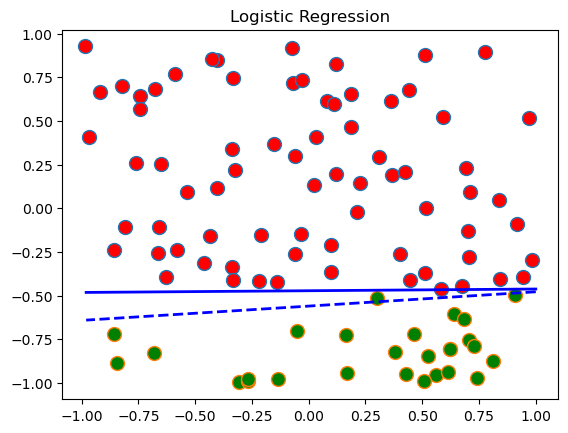

In [19]:
from logistic import logistic, sigmoid

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data


for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    y_train = (y + 1) // 2
    w_g = logistic(X, y_train)

    X_test = X[:, nTrain-19:]
    y_test = y[:, nTrain-19:]

    #TODO
    # Compute training, testing error
    proba = sigmoid(w_g.T @ np.vstack((np.ones((1, X.shape[1])), X)))
    y_pred = (proba > 0.5).astype(int).T
    E_train = np.mean(y_train.T != y_pred)
    
    proba_test = sigmoid(w_g.T @ np.vstack((np.ones((1, X_test.shape[1])), X_test)))
    y_test_pred = (proba_test > 0.5).astype(int).T
    y_test_true = (y_test + 1) // 2
    E_test = np.mean(y_test_true.T != y_test_pred)
    
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, 2*y_train - 1, w_f, w_g, 'Logistic Regression')

## Part5: Logistic Regression: noisy

E_train is 0.14, E_test is 0.1637


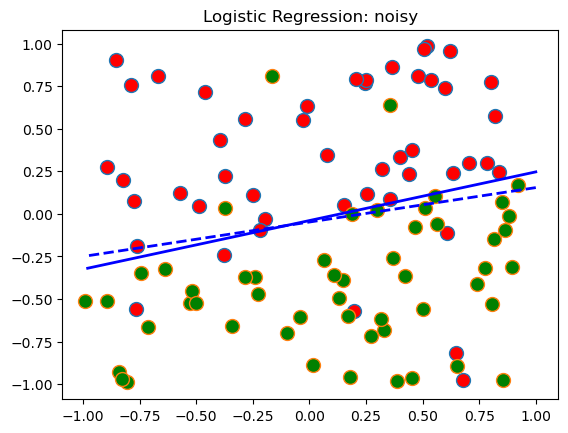

In [21]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    y_train = (y + 1) // 2
    w_g = logistic(X, y_train)

    X_test, y_test, w_f2 = mkdata(nTest, 'noisy')
    y_test_true = (y_test + 1) // 2
    
    #TODO
    # Compute training, testing error
    proba = sigmoid(w_g.T @ np.vstack((np.ones((1, X.shape[1])), X)))
    y_pred = (proba > 0.5).astype(int).T
    E_train = np.mean(y_train.T != y_pred)
    
    proba_test = sigmoid(w_g.T @ np.vstack((np.ones((1, X_test.shape[1])), X_test)))
    y_test_pred = (proba_test > 0.5).astype(int).T
    y_test_true = (y_test + 1) // 2
    E_test = np.mean(y_test_true.T != y_test_pred)
    
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part6: SVM

E_train is 0.01, E_test is 0.0
Average number of support vectors is 26.94.


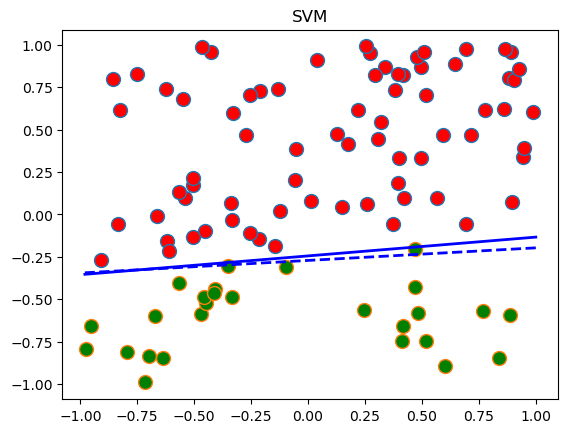

In [23]:
from svm import svm

nRep = 1000; # number of replica tes
nTrain = 100; # number of training data
sumNum = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    X_test = X[:, nTrain-19:]
    y_test = y[:, nTrain-19:]
    #TODO
    # Compute training, testing error
    # Sum up number of support vectors
    y_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T
    E_train = np.mean(y.T != y_pred)
    
    y_test_pred = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X_test.shape[1])), X_test)))).T
    E_test =np.mean(y_test.T != y_test_pred)
    sumNum += num_sc

avgNum = sumNum / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')